In [2]:
import sys
print(sys.executable)


c:\Projects\worldcup-social-media-nlp\footenv\Scripts\python.exe


In [77]:
import pandas as pd 
worldcup2018=pd.read_csv(r"C:\Projects\worldcup-social-media-nlp\Data\FIFA.csv",delimiter=',')
worldcup2022=pd.read_csv(r"C:\Projects\worldcup-social-media-nlp\Data\fifa_world_cup_2022_tweets.csv", delimiter=',')

# worldcup2018 Dataset

In [2]:
#dataset shape
print(worldcup2018.shape)

(530000, 16)


In [3]:
print("Columns of the dataset of Worldcup2018: \n", worldcup2018.columns)

Columns of the dataset of Worldcup2018: 
 Index(['ID', 'lang', 'Date', 'Source', 'len', 'Orig_Tweet', 'Tweet', 'Likes',
       'RTs', 'Hashtags', 'UserMentionNames', 'UserMentionID', 'Name', 'Place',
       'Followers', 'Friends'],
      dtype='str')


In [6]:
print("Data Types of each Column of the dataset of Worldcup2018: \n", worldcup2018.dtypes)

Data Types of each Column of the dataset of Worldcup2018: 
 ID                  int64
lang                  str
Date                  str
Source                str
len                 int64
Orig_Tweet            str
Tweet                 str
Likes               int64
RTs                 int64
Hashtags              str
UserMentionNames      str
UserMentionID         str
Name                  str
Place                 str
Followers           int64
Friends             int64
dtype: object


In [ ]:
print(worldcup2018.head(5))

                    ID lang                 Date               Source  len  \
0  1013597060640145408   en  2018-07-02 01:35:45  Twitter for Android  140   
1  1013597056219295744   en  2018-07-02 01:35:44  Twitter for Android  139   
2  1013597047482544130   en  2018-07-02 01:35:42  Twitter for Android  107   
3  1013597044198391808   en  2018-07-02 01:35:41   Twitter Web Client  142   
4  1013597039999926272   en  2018-07-02 01:35:40  Twitter for Android  140   

                                          Orig_Tweet  \
0  RT @Squawka: Only two goalkeepers have saved t...   
1  RT @FCBarcelona: ?? @ivanrakitic scores the wi...   
2  RT @javierfernandez: Tonight we have big game....   
3  We get stronger\r\nTurn the music up now\r\nWe...   
4  RT @Squawka: Only two goalkeepers have saved t...   

                                               Tweet  Likes   RTs  \
0  Only two goalkeepers have saved three penaltie...      0   477   
1  scores the winning penalty to send into the qu...    

In [9]:
#check missing values
print("missing values in worldcup2018 dataset \n",worldcup2018.isnull().sum())

missing values in worldcup2018 dataset 
 ID                       0
lang                     0
Date                     0
Source                   0
len                      0
Orig_Tweet               0
Tweet                  551
Likes                    0
RTs                      0
Hashtags             61543
UserMentionNames     74159
UserMentionID        74159
Name                    56
Place               139298
Followers                0
Friends                  0
dtype: int64


In [ ]:
#check empty texts in worldcup2018 dataset
str_columns=worldcup2018.select_dtypes(include="str").columns
for col in str_columns:
    print(col,":",(worldcup2018[col].isnull().sum()).sum()+(worldcup2018[col].str.strip() == '').sum())

lang : 0
Date : 0
Source : 0
Orig_Tweet : 0
Tweet : 551
Hashtags : 61543
UserMentionNames : 74159
UserMentionID : 74159
Name : 56
Place : 139553


In [ ]:
#number languages exist in posts of worldcup2018 dataset
print(worldcup2018['lang'].unique())
print(worldcup2018['lang'].value_counts())

<StringArray>
['en']
Length: 1, dtype: str
lang
en    530000
Name: count, dtype: int64


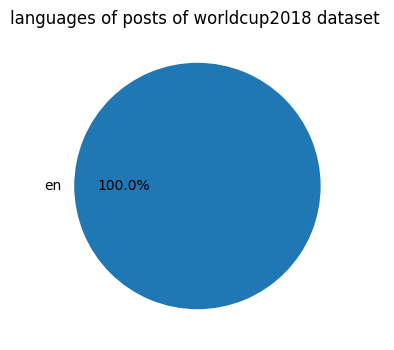

In [13]:
import matplotlib.pyplot as plt 
lang=worldcup2018['lang'].value_counts()
lang.plot(kind='pie', figsize=(6,4), autopct='%1.1f%%')
plt.title("languages of posts of worldcup2018 dataset ")
plt.show()

In [ ]:
#Places people post from about WorldCup2018
print("Number of Places people post from about WorldCup2018: ",worldcup2018['Place'].nunique(), "\n")
print(worldcup2018['Place'].value_counts())
print("Top10 places by number of posts: \n",worldcup2018['Place'].value_counts().head(10))

Number of Places people post from about WorldCup2018:  95189 

Place
Lagos, Nigeria       4953
London, England      4701
Nigeria              3619
London               3225
India                2851
                     ... 
SAITAMA?Japan           1
Córdoba, Colombia       1
shazam (2019)           1
Entre-Ijuís, RS         1
HOUSTON.TX.BABYY.       1
Name: count, Length: 95189, dtype: int64
Top10 places by number of posts: 
 Place
Lagos, Nigeria     4953
London, England    4701
Nigeria            3619
London             3225
India              2851
Indonesia          2818
Nairobi, Kenya     2469
United Kingdom     2444
South Africa       2367
United States      2321
Name: count, dtype: int64


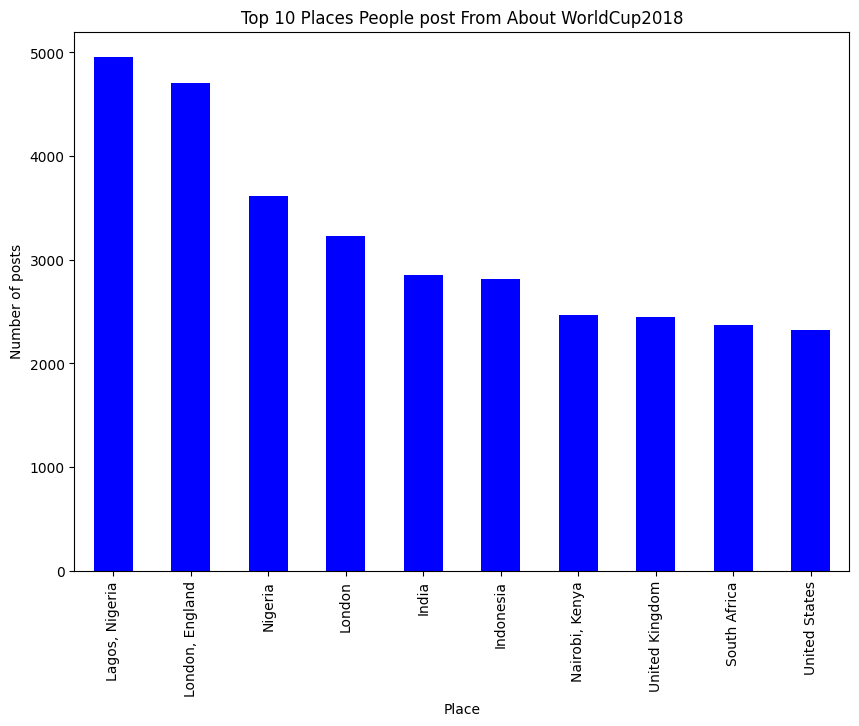

In [ ]:
#Top 10 Places People post From About WorldCup2018
import matplotlib.pyplot as plt 
top10_places= worldcup2018['Place'].value_counts().head(10)
top10_places.plot(kind='bar',figsize=(10,7), color='blue')
plt.title("Top 10 Places People post From About WorldCup2018")
plt.xlabel("Place")
plt.ylabel("Number of posts")
plt.show()

In [ ]:
#Number of Hashtags used in WorldCup2018
print("Number of Hashtags used in WorldCup2018: ",worldcup2018['Hashtags'].nunique(), "\n")
print(worldcup2018['Hashtags'].value_counts())

Number of Hashtags used in WorldCup2018:  37139 

Hashtags
WorldCup                                                               154747
FRA,WorldCup                                                            15591
FRA,WorldCup,FRACRO,WorldCupFinal                                        9038
worldcup                                                                 8769
CRO,WorldCup                                                             7295
                                                                        ...  
WorldCup,soccercity,sandiego,northpark,northparkmainstreet,sc4allsd         1
WorldCup,youthsoccer,stlsoccer                                              1
blackisbeautiful,WorldCupFinal,WorldCup                                     1
Apeshit,WorldCup,OTRII                                                      1
WorldCup,Competition,win,IndianFood,giveaway,comp                           1
Name: count, Length: 37139, dtype: int64


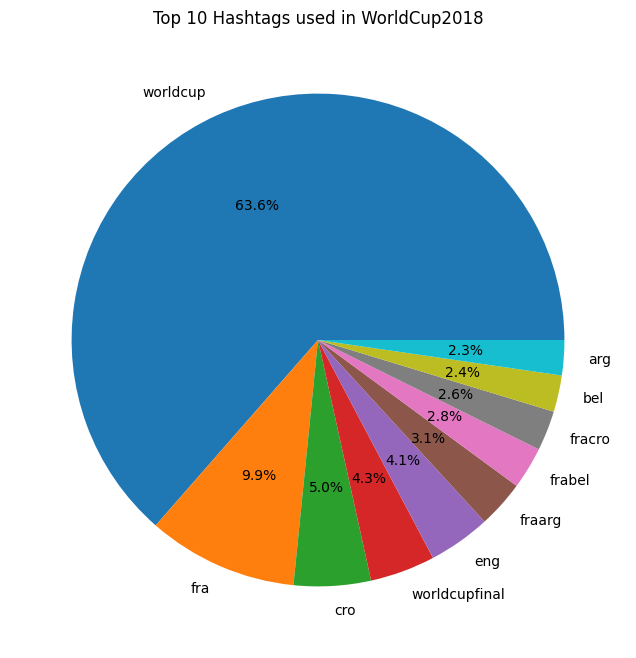

In [26]:
#Top 10 Hashtags used in WorldCup2018
import matplotlib.pyplot as plt
worldcup2018['Hashtags'] = worldcup2018['Hashtags'].str.split(',')
worldcup2018 = worldcup2018.explode('Hashtags')
worldcup2018['Hashtags'] = worldcup2018['Hashtags'].str.strip().str.lower()
top10_hashtags=worldcup2018['Hashtags'].value_counts().head(10)
top10_hashtags.plot(kind='pie', figsize=(10,8),autopct='%1.1f%%')
plt.title("Top 10 Hashtags used in WorldCup2018")
plt.show()

In [ ]:
#What platform people post from in worlcup2018
print(worldcup2018['Source'].nunique())
print(worldcup2018['Source'].value_counts())

865
Source
Twitter for Android        231895
Twitter for iPhone         207576
Twitter Web Client          40442
Twitter Lite                20426
Twitter for iPad             8332
                            ...  
Cheap Bots, Done Quick!         1
?????                           1
Donate a Photo                  1
jgunnar007                      1
cjdhenry                        1
Name: count, Length: 865, dtype: int64


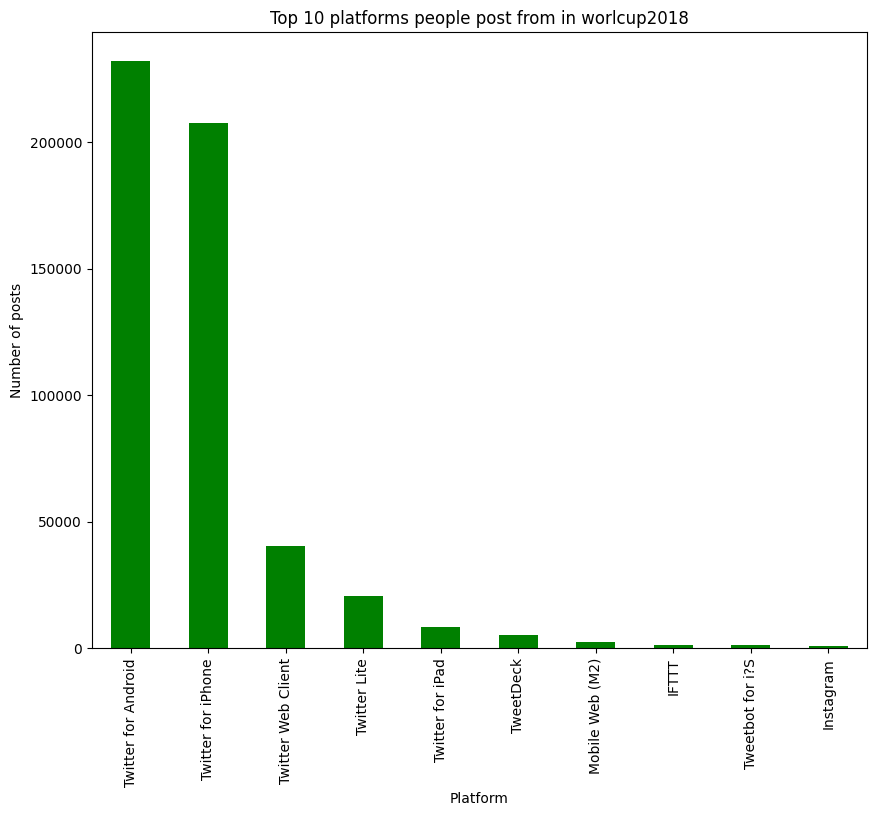

In [98]:
top10_plateforms2018= worldcup2018['Source'].value_counts().head(10)
top10_plateforms2018.plot(kind='bar', figsize=(10,8), color='green')
plt.title("Top 10 platforms people post from in worlcup2018")
plt.xlabel("Platform")
plt.ylabel("Number of posts")
plt.show()

In [103]:
#other platforms
print((worldcup2018['Source']=="Instagram").sum())
print((worldcup2018['Source']=="Facebook").sum())
print((worldcup2018['Source']=="Google").sum())

956
871
51


In [34]:
# Convert Date column to datetime
worldcup2018['Date'] = pd.to_datetime(worldcup2018['Date'], errors='coerce')
print(worldcup2018['Date'].dtype)

datetime64[us]


In [35]:
# Count number of posts per month
posts_per_month=worldcup2018.groupby(worldcup2018['Date'].dt.month).size()
print(posts_per_month.head())

Date
6    176572
7    925170
dtype: int64


In [36]:
# number of days number of posts per each day
posts_day=worldcup2018.groupby(worldcup2018['Date'].dt.day).size()
print(posts_day.nunique(),"days")
print(posts_day)

9 days
Date
1     208801
2      29419
3      49366
4      31806
10    163540
11    101353
15    340885
29       987
30    175585
dtype: int64


In [37]:
# Count number of posts per day
posts_per_day2018 = worldcup2018.groupby(worldcup2018['Date'].dt.date).size()
print (posts_per_day2018.head())


Date
2018-06-29       987
2018-06-30    175585
2018-07-01    208801
2018-07-02     29419
2018-07-03     49366
dtype: int64


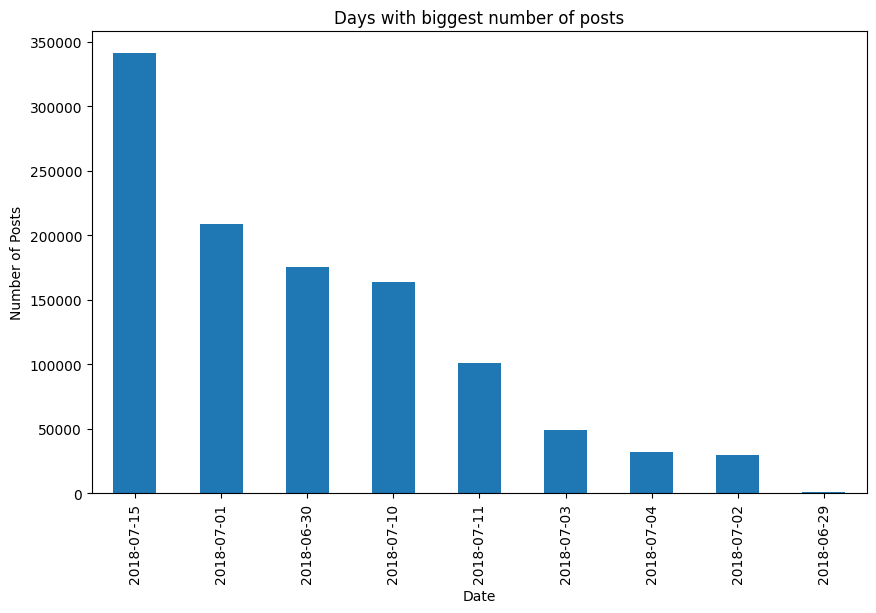

In [38]:
#Days with biggest number of posts
top_days_posts= posts_per_day2018.sort_values(ascending=False)
top_days_posts.plot(kind='bar',figsize=(10,6))
plt.title("Days with biggest number of posts")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.show()

In [39]:
peak_date = posts_per_day2018.idxmax()
print(peak_date)


2018-07-15


In [40]:
#top hashtags in the peak day
peak_date = posts_per_day2018.idxmax()
peak_posts=worldcup2018[worldcup2018['Date'].dt.date==peak_date]
top_hashtags_peak_day=peak_posts['Hashtags']
top_hashtags_peak_day.value_counts().head(10)

Hashtags
worldcup         158595
fra               35182
worldcupfinal     27251
fracro            18027
cro               13443
bel                7194
france             6397
croatia            5800
esp                2864
eng                2756
Name: count, dtype: int64

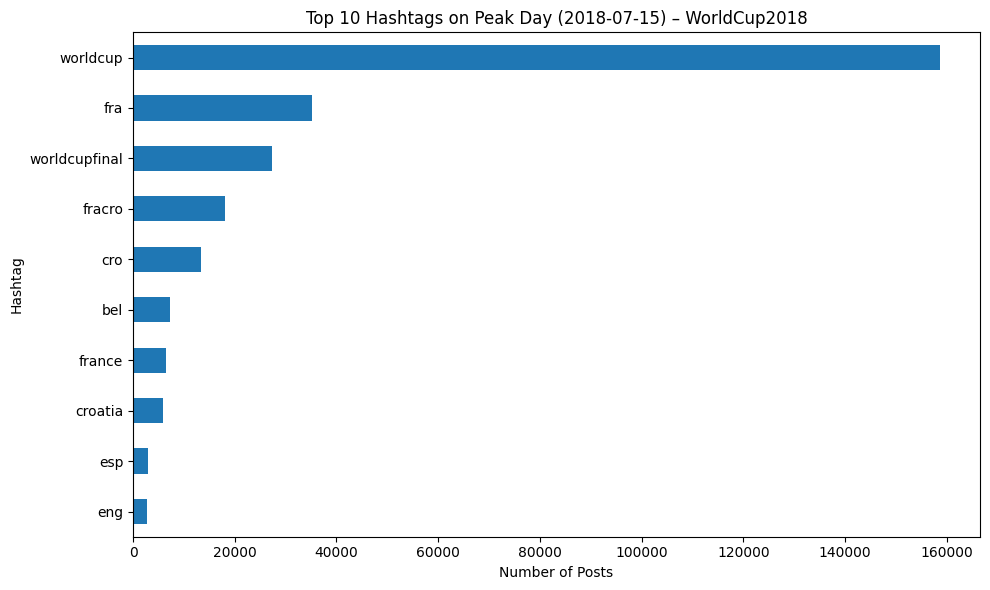

In [41]:
import matplotlib.pyplot as plt

top10_hashtags_peak_day=top_hashtags_peak_day.value_counts().head(10).sort_values()
top10_hashtags_peak_day.plot(kind='barh',figsize=(10,6))
plt.title(f"Top 10 Hashtags on Peak Day ({peak_date}) – WorldCup2018")
plt.xlabel("Number of Posts")
plt.ylabel("Hashtag")
plt.tight_layout()
plt.show()


In [42]:
import pandas as pd
date_hashtags= worldcup2018[['Date', 'Hashtags']]
date_hashtags['Date']= pd.to_datetime(date_hashtags['Date'])
date_hashtags['Date']= date_hashtags['Date'].dt.date
date_hashtags['Hashtags'] = date_hashtags['Hashtags'].str.split(',')
date_hashtags = date_hashtags.explode('Hashtags')
date_hashtags['Hashtags'] = date_hashtags['Hashtags'].str.strip().str.lower()
print(date_hashtags.head())


         Date  Hashtags
0  2018-07-02  worldcup
0  2018-07-02       por
0  2018-07-02       eng
1  2018-07-02  worldcup
2  2018-07-02  worldcup


In [56]:
#hashtags = date_hashtags.groupby(date_hashtags['Date']).size()
hashtags = date_hashtags.groupby(date_hashtags['Hashtags']).size()
peak_hashtags=hashtags.sort_values(ascending=False)
print(peak_hashtags)

Hashtags
worldcup             439820
fra                   68207
cro                   34938
worldcupfinal         29539
eng                   28259
                      ...  
zidan                     1
zicaparaportugal          1
zicaparaargentina         1
zhangyixing               1
zhaapun                   1
Length: 19087, dtype: int64


In [63]:
hashtags_per_day_count=date_hashtags.groupby(['Date','Hashtags']).size().reset_index(name='count').sort_values(['Date','count'], ascending=[True, False])
hashtags_per_day_count

,Date,Hashtags,count
139,2018-06-29,worldcup,345
48,2018-06-29,fifastadiumdj,166
105,2018-06-29,powerbyexo,76
44,2018-06-29,exo,29
0,2018-06-29,??,15
...,...,...,...
28909,2018-07-15,zimdecides2018,1
28910,2018-07-15,zimelections2018,1
28912,2018-07-15,zivila,1
28914,2018-07-15,zolilekhumalo,1


In [ ]:
top5_hashtags_per_day = (
    hashtags_per_day_count
    .sort_values(['Date', 'count'], ascending=[True, False])
    .groupby('Date')
    .head(5)
)
print(top5_hashtags_per_day)

             Date       Hashtags   count
139    2018-06-29       worldcup     345
48     2018-06-29  fifastadiumdj     166
105    2018-06-29     powerbyexo      76
44     2018-06-29            exo      29
0      2018-06-29             ??      15
4311   2018-06-30       worldcup   62419
1567   2018-06-30         fraarg   17259
1563   2018-06-30            fra   15673
341    2018-06-30            arg   12288
1438   2018-06-30  fifastadiumdj    7032
9735   2018-07-01       worldcup   82919
5413   2018-07-01         croden   12149
5383   2018-07-01            cro   10737
5558   2018-07-01            den    8127
6178   2018-07-01            fra    4018
11314  2018-07-02       worldcup    9347
10331  2018-07-02  fifastadiumdj    1935
10893  2018-07-02     powerbyexo    1884
10143  2018-07-02            cro     591
10281  2018-07-02         esprus     579
12664  2018-07-03       worldcup   17103
11716  2018-07-03            eng    9346
12518  2018-07-03     threelions    5151
11591  2018-07-0

In [64]:
peak_day = hashtags_per_day_count.groupby('Date')['count'].sum().idxmax()
print("The day with most hashtags:", peak_day)


The day with most hashtags: 2018-07-15


# worldcup2022 Dataset

In [4]:
#dataset shape
print(worldcup2022.shape)

(22524, 6)


In [5]:
print("Columns of the dataset of Worldcup2022: \n", worldcup2022.columns)

Columns of the dataset of Worldcup2022: 
 Index(['Unnamed: 0', 'Date Created', 'Number of Likes', 'Source of Tweet',
       'Tweet', 'Sentiment'],
      dtype='str')


In [7]:
print("Data Types of each Column of the dataset of Worldcup2022: \n", worldcup2022.dtypes)

Data Types of each Column of the dataset of Worldcup2022: 
 Unnamed: 0         int64
Date Created         str
Number of Likes    int64
Source of Tweet      str
Tweet                str
Sentiment            str
dtype: object


In [8]:
print(worldcup2022.head(5))

   Unnamed: 0               Date Created  Number of Likes  \
0           0  2022-11-20 23:59:21+00:00                4   
1           1  2022-11-20 23:59:01+00:00                3   
2           2  2022-11-20 23:58:41+00:00                1   
3           3  2022-11-20 23:58:33+00:00                1   
4           4  2022-11-20 23:58:28+00:00                0   

       Source of Tweet                                              Tweet  \
0      Twitter Web App  What are we drinking today @TucanTribe \n@MadB...   
1   Twitter for iPhone  Amazing @CanadaSoccerEN  #WorldCup2022 launch ...   
2   Twitter for iPhone  Worth reading while watching #WorldCup2022 htt...   
3      Twitter Web App  Golden Maknae shinning bright\n\nhttps://t.co/...   
4  Twitter for Android  If the BBC cares so much about human rights, h...   

  Sentiment  
0   neutral  
1  positive  
2  positive  
3  positive  
4  negative  


In [10]:
#check missing values
print("missing values in worldcup2022 dataset \n",worldcup2022.isnull().sum())

missing values in worldcup2022 dataset 
 Unnamed: 0         0
Date Created       0
Number of Likes    0
Source of Tweet    0
Tweet              0
Sentiment          0
dtype: int64


In [11]:
#check empty texts in worldcup2022 dataset
str_columns=worldcup2022.select_dtypes(include="str").columns
for col in str_columns:
    print(col,":",(worldcup2022[col].isnull().sum()).sum()+(worldcup2022[col].str.strip() == '').sum())

Date Created : 0
Source of Tweet : 0
Tweet : 0
Sentiment : 0


In [ ]:
##What platform people post from in worlcup2022
print(worldcup2022['Source of Tweet'].nunique())
print(worldcup2022['Source of Tweet'].value_counts())

109
Source of Tweet
Twitter for iPhone      9507
Twitter for Android     6820
Twitter Web App         4505
TweetDeck                386
Twitter for iPad         240
                        ... 
RepurposeIO                1
Copa Do mundo 2022         1
FS_Poster_App              1
Gain Platform              1
SnapStream TV Search       1
Name: count, Length: 109, dtype: int64


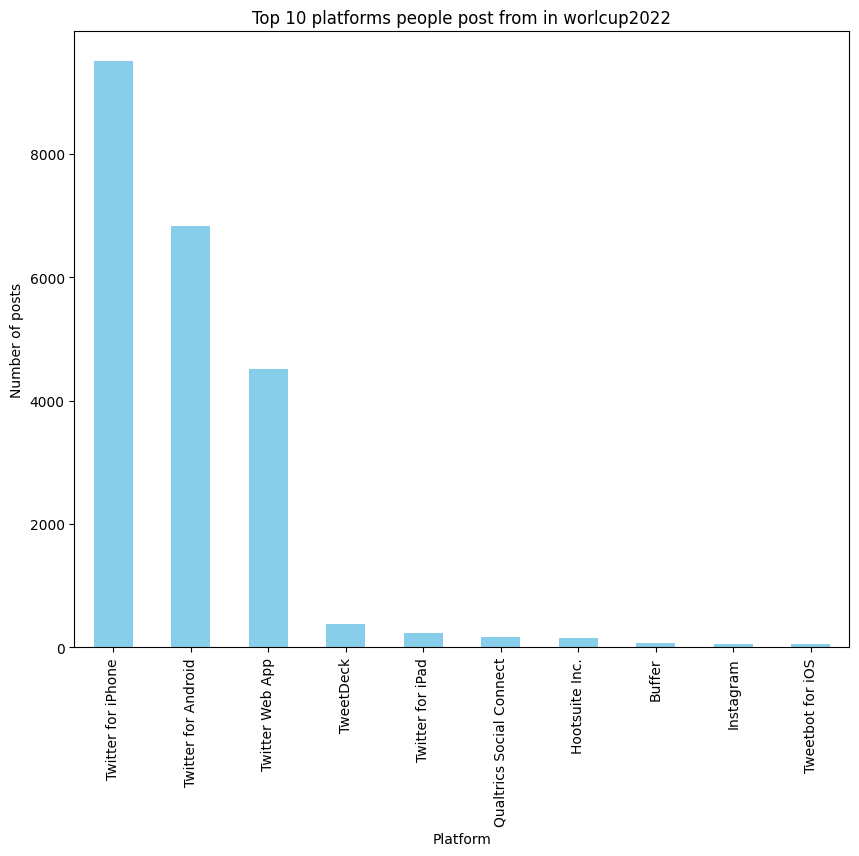

In [15]:
top10_plateforms2022= worldcup2022['Source of Tweet'].value_counts().head(10)
top10_plateforms2022.plot(kind='bar', figsize=(10,8), color='skyblue')
plt.title("Top 10 platforms people post from in worlcup2022")
plt.xlabel("Platform")
plt.ylabel("Number of posts")
plt.show()

In [16]:
#other platforms
print((worldcup2022['Source of Tweet']=="Instagram").sum())
print((worldcup2022['Source of Tweet']=="Facebook").sum())
print((worldcup2022['Source of Tweet']=="Google").sum())

62
0
0


In [89]:
import pandas as pd 
worldcup2022['Date Created']=pd.to_datetime(worldcup2022['Date Created'],errors='coerce')
posts_days=worldcup2022.groupby(worldcup2022['Date Created'].dt.date).size()
print(posts_days.head())


Date Created
2022-11-20    22524
dtype: int64


In [90]:
sentiments=worldcup2022.groupby(worldcup2022['Sentiment']).size()
print(sentiments)

Sentiment
negative    5784
neutral     8251
positive    8489
dtype: int64


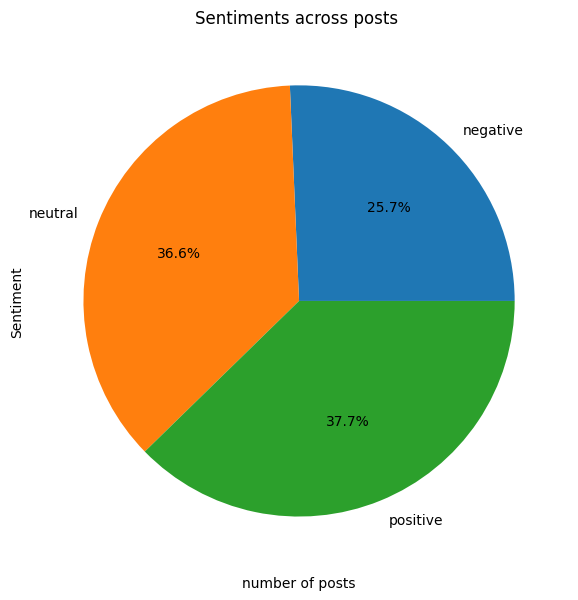

In [95]:
import matplotlib.pyplot as plt
sentiments.plot(kind='pie', figsize=(9,7), autopct='%1.1f%%')
plt.title('Sentiments across posts ')
plt.xlabel('number of posts')
plt.ylabel('Sentiment')
plt.show()